In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt
from google.colab import files
import io
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
from tensorflow.keras.regularizers import l1, l2


In [ ]:
sns.set_theme()

In [ ]:
uploaded = files.upload()

Saving smh_23-24_training_set copy.csv to smh_23-24_training_set copy.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['smh_23-24_training_set copy.csv']))
print(data)

                      date  microsensor_pm25  hourofday  monthofyear  season  \
0      2023-01-01 00:00:00         23.241923          0            1  Winter   
1      2023-01-01 01:00:00         23.285335          1            1  Winter   
2      2023-01-01 02:00:00         21.687298          2            1  Winter   
3      2023-01-01 03:00:00         19.969197          3            1  Winter   
4      2023-01-01 04:00:00         16.398725          4            1  Winter   
...                    ...               ...        ...          ...     ...   
14148  2024-12-12 19:00:00        155.715878         19           12  Winter   
14149  2024-12-12 20:00:00        119.145626         20           12  Winter   
14150  2024-12-12 21:00:00         78.848558         21           12  Winter   
14151  2024-12-12 22:00:00         79.502087         22           12  Winter   
14152  2024-12-12 23:00:00         52.503433         23           12  Winter   

       reference_pm25  temperature  hum

In [ ]:
data['date'] = pd.to_datetime(data.date, format='%Y-%m-%d %H:%M:%S')
data['Year'] = data['date'].dt.year
data

,date,microsensor_pm25,hourofday,monthofyear,season,reference_pm25,temperature,humidity,Year
0,2023-01-01 00:00:00,23.241923,0,1,Winter,15.2,10.70,99.90,2023
1,2023-01-01 01:00:00,23.285335,1,1,Winter,15.9,10.16,99.90,2023
2,2023-01-01 02:00:00,21.687298,2,1,Winter,15.2,10.14,99.90,2023
3,2023-01-01 03:00:00,19.969197,3,1,Winter,13.6,10.05,99.90,2023
4,2023-01-01 04:00:00,16.398725,4,1,Winter,11.8,9.77,99.90,2023
...,...,...,...,...,...,...,...,...,...
14148,2024-12-12 19:00:00,155.715878,19,12,Winter,24.3,2.59,97.00,2024
14149,2024-12-12 20:00:00,119.145626,20,12,Winter,30.5,1.63,99.46,2024
14150,2024-12-12 21:00:00,78.848558,21,12,Winter,28.1,1.22,99.90,2024
14151,2024-12-12 22:00:00,79.502087,22,12,Winter,28.5,0.53,99.90,2024


In [ ]:
#Got reference dataset
reference_data = data.drop(['date','microsensor_pm25','season','hourofday','monthofyear','Year'],axis=1)
reference_data

,reference_pm25,temperature,humidity
0,15.2,10.70,99.90
1,15.9,10.16,99.90
2,15.2,10.14,99.90
3,13.6,10.05,99.90
4,11.8,9.77,99.90
...,...,...,...
14148,24.3,2.59,97.00
14149,30.5,1.63,99.46
14150,28.1,1.22,99.90
14151,28.5,0.53,99.90


In [ ]:
#Microsensor data
microsencor_data = data.drop(['date','reference_pm25','season'],axis=1)
microsencor_data

,microsensor_pm25,hourofday,monthofyear,temperature,humidity,Year
0,23.241923,0,1,10.70,99.90,2023
1,23.285335,1,1,10.16,99.90,2023
2,21.687298,2,1,10.14,99.90,2023
3,19.969197,3,1,10.05,99.90,2023
4,16.398725,4,1,9.77,99.90,2023
...,...,...,...,...,...,...
14148,155.715878,19,12,2.59,97.00,2024
14149,119.145626,20,12,1.63,99.46,2024
14150,78.848558,21,12,1.22,99.90,2024
14151,79.502087,22,12,0.53,99.90,2024


In [ ]:
microsensor_data = microsencor_data.rename(columns={
    'microsensor_pm25': 'reference_pm25',
})
microsensor_data

,reference_pm25,hourofday,monthofyear,temperature,humidity,Year
0,23.241923,0,1,10.70,99.90,2023
1,23.285335,1,1,10.16,99.90,2023
2,21.687298,2,1,10.14,99.90,2023
3,19.969197,3,1,10.05,99.90,2023
4,16.398725,4,1,9.77,99.90,2023
...,...,...,...,...,...,...
14148,155.715878,19,12,2.59,97.00,2024
14149,119.145626,20,12,1.63,99.46,2024
14150,78.848558,21,12,1.22,99.90,2024
14151,79.502087,22,12,0.53,99.90,2024


In [ ]:
column_order = ['hourofday', 'monthofyear', 'reference_pm25','temperature','humidity', 'Year' ]
microsensor_data = microsensor_data[column_order]
microsensor_data = microsensor_data.drop(['hourofday','monthofyear','Year'], axis = 1)

In [ ]:
#Normilazing reference data
scaler = StandardScaler()
reference_data_scaled = scaler.fit_transform(reference_data)
reference_data_scaled

array([[ 0.53041725, -0.52631602,  0.70402572],
       [ 0.61019887, -0.58854449,  0.70402572],
       [ 0.53041725, -0.59084925,  0.70402572],
       ...,
       [ 2.00067868, -1.61877138,  0.70402572],
       [ 2.04626818, -1.69828554,  0.70402572],
       [ 2.88967396, -1.72479026,  0.70402572]])

In [ ]:
#Normilazing microsensor data
microsencor_data_scaled = scaler.transform(microsensor_data)
microsencor_data_scaled

array([[ 1.4469854 , -0.52631602,  0.70402572],
       [ 1.45193325, -0.58854449,  0.70402572],
       [ 1.26979894, -0.59084925,  0.70402572],
       ...,
       [ 7.78468239, -1.61877138,  0.70402572],
       [ 7.85916748, -1.69828554,  0.70402572],
       [ 4.7820296 , -1.72479026,  0.70402572]])

In [ ]:
#Dimention of input for NN
input_dim = reference_data_scaled.shape[1]
encoding_dim = 3
input_dim

3

In [ ]:
#Creating layers of NN
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu',kernel_regularizer=l2(0.01))(input_layer)
decoder = Dense(input_dim, activation='linear')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
#Training
history = autoencoder.fit(reference_data_scaled, reference_data_scaled,
                          epochs=20,
                          batch_size=32,
                          validation_split=0.2,
                          shuffle=True)

Epoch 1/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2890 - val_loss: 0.6226
Epoch 2/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8925 - val_loss: 0.4980
Epoch 3/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7158 - val_loss: 0.3256
Epoch 4/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4555 - val_loss: 0.2170
Epoch 5/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3144 - val_loss: 0.1626
Epoch 6/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2289 - val_loss: 0.1405
Epoch 7/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1959 - val_loss: 0.1296
Epoch 8/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1699 - val_loss: 0.1233
Epoch 9/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1550 - val_loss: 0.1174
Epoch 10/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1419 - val_loss: 0.1142
Epoch 11/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1313 - val_loss: 0.1130
Epoch 12/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

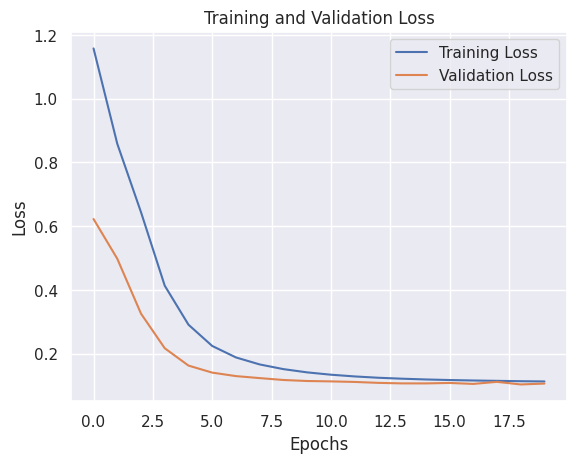

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
reconstructed_microsensor_data = autoencoder.predict(microsencor_data_scaled)

443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
reconstructed_microsensor_data

array([[ 1.3766594 , -0.80143845,  0.47020912],
       [ 1.389472  , -0.8307525 ,  0.4993322 ],
       [ 1.2155377 , -0.80842555,  0.5174675 ],
       ...,
       [ 3.8738384 , -0.87601197, -0.06093454],
       [ 3.8851526 , -0.8986691 , -0.03877139],
       [ 4.2465973 , -1.6224734 ,  0.66924834]], dtype=float32)

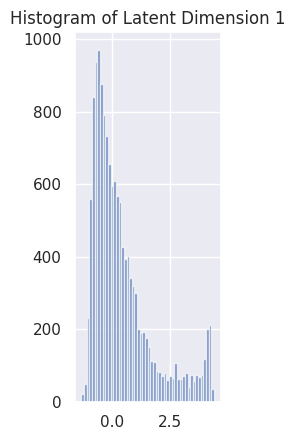

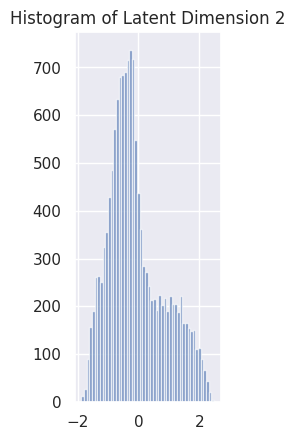

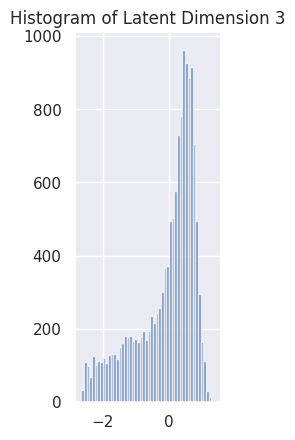

In [ ]:
plt.subplot(1,3,1)
plt.hist(reconstructed_microsensor_data[:, 0], bins=50, alpha=0.7)
plt.title(f'Histogram of Latent Dimension {1}')
plt.show()
plt.subplot(1,3,2)
plt.hist(reconstructed_microsensor_data[:, 1], bins=50, alpha=0.7)
plt.title(f'Histogram of Latent Dimension {2}')
plt.show()
plt.subplot(1,3,3)
plt.hist(reconstructed_microsensor_data[:, 2], bins=50, alpha=0.7)
plt.title(f'Histogram of Latent Dimension {3}')
plt.show()

In [ ]:
reference_reconstructed = autoencoder.predict(reference_data_scaled)
reference_error = np.mean(np.square(reference_data_scaled - reference_reconstructed), axis=1)
threshold = np.mean(reference_error) + 3 * np.std(reference_error)
print(f"Threshold for anomalies: {threshold}")

443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Threshold for anomalies: 0.8048642016086134


In [ ]:
reference_error

array([0.01587974, 0.01150745, 0.00976971, ..., 0.03861409, 0.05095096,
       0.0251431 ])

In [ ]:
reconstruction_error = np.mean(np.square(microsencor_data_scaled - reconstructed_microsensor_data), axis=1)

In [ ]:
predictions = np.where(reconstruction_error > threshold, -1, 1)

In [ ]:
timestamps = data['date']
valid_indices = predictions == 1
anomaly_indices = predictions == -1

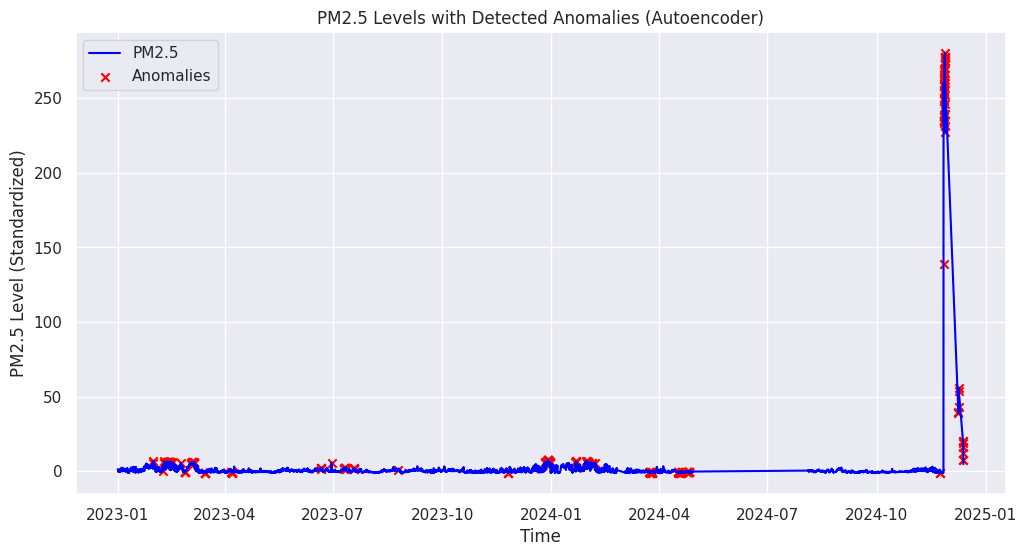

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(timestamps, microsencor_data_scaled[:, 0], label="PM2.5", color="blue")
plt.scatter(timestamps[anomaly_indices], microsencor_data_scaled[anomaly_indices, 0],
            color="red", label="Anomalies", marker='x')
plt.xlabel("Time")
plt.ylabel("PM2.5 Level (Standardized)")
plt.title("PM2.5 Levels with Detected Anomalies (Autoencoder)")
plt.legend()
plt.show()

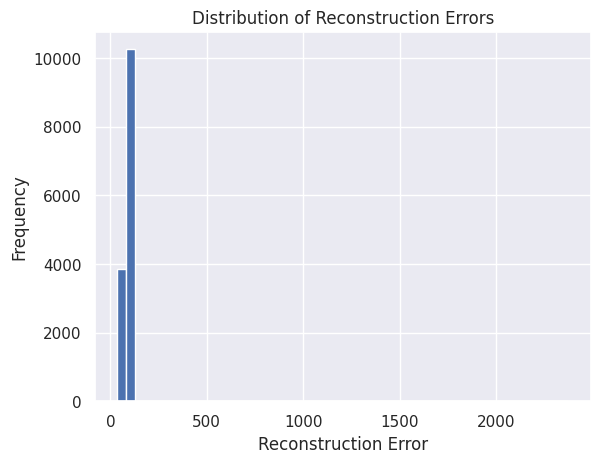

In [ ]:
plt.hist(reconstruction_error, bins=50)
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Reconstruction Errors")
plt.show()